# Введение в искусственные нейронные сети
## Урок 1. Основы обучения нейронных сетей

1. Попробуйте видоизменить параметры разобранной на уроке двухслойной нейронной сети таким образом, чтобы улучшить ее точность (число нейронов, число эпох , можно изменять число слоев).
2. Проведите анализ — что приводит к ухудшению точности нейронной сети? Что приводит к увеличению ее точности?

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.datasets import load_iris
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

from scipy.special import expit # sigmoid   1/(1+np.exp(-x))

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [2]:
### Шаг 0. Подготовка данных.
data = load_iris()
data_X = pd.DataFrame(data.data, columns=data.feature_names)
data_y = pd.DataFrame(data.target, columns=['y'])

In [3]:
scaler = MinMaxScaler()
cols_for_scale = data_X.columns.tolist()
data_X[cols_for_scale] = scaler.fit_transform(data_X[cols_for_scale])
X = data_X.values
X[:5, :]

array([[0.22222222, 0.625     , 0.06779661, 0.04166667],
       [0.16666667, 0.41666667, 0.06779661, 0.04166667],
       [0.11111111, 0.5       , 0.05084746, 0.04166667],
       [0.08333333, 0.45833333, 0.08474576, 0.04166667],
       [0.19444444, 0.66666667, 0.06779661, 0.04166667]])

In [4]:
y = pd.get_dummies(data_y['y']).values
y[:5, :]

array([[1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0]], dtype=uint8)

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=12)

In [6]:
X_train.shape, X_test.shape

((90, 4), (60, 4))

In [7]:
### Шаг 3. Обученние нейронной сети

# определим число нейронов скрытого слоя
neuron_numb = 25

# присваевание случайных весов
# np.random.seed(99)
w0 = 2*np.random.random((4, neuron_numb)) - 1 # для входного слоя  

w1 = 2*np.random.random((neuron_numb, 5)) - 1 # для внутреннего слоя 
w2 = 2*np.random.random((5, neuron_numb)) - 1 # для внутреннего слоя

w3 = 2*np.random.random((neuron_numb, 3)) - 1 # для выходного слоя

# скорость обучения 
learning_rate = 0.07

# массив для ошибок, чтобы потом построить график
errors = []

stop_iteration = 0

# процесс обучения
for epoch in range(100000):
    # прямое распространение(feed forward)
    layer0 = X_train
    layer1 = expit(np.dot(layer0, w0))
    layer2 = expit(np.dot(layer1, w1))
    layer3 = expit(np.dot(layer2, w2))
    layer4 = expit(np.dot(layer3, w3))
    
    layer4_error = y_train - layer4
    layer4_delta = layer4_error * layer4 * (1 - layer4) # производная сигмоиды layer4 * (1 - layer4)
     
    layer3_error = layer4_delta.dot(w3.T)
    layer3_delta = layer3_error * layer3 * (1 - layer3)
  
    layer2_error = layer3_delta.dot(w2.T)
    layer2_delta = layer2_error * layer2 * (1 - layer2)
    
    layer1_error = layer2_delta.dot(w1.T)
    layer1_delta = layer1_error * layer1 * (1 - layer1)
    
    # коррекция
    w3 += layer3.T.dot(layer4_delta) * learning_rate
    w2 += layer2.T.dot(layer3_delta) * learning_rate 
    w1 += layer1.T.dot(layer2_delta) * learning_rate 
    w0 += layer0.T.dot(layer1_delta) * learning_rate
    
    # метрика модели
    error = np.mean(np.abs(layer4_error))
    errors.append(error)
    accuracy = (1 - error) * 100
    
#     learning_rate *= 1.00001 
    
    if epoch % 10000 == 0:
        stop_iteration = accuracy
    
    if epoch % 1000 == 0:
        print(accuracy, epoch, learning_rate)
        
#     if stop_iteration > accuracy:
#         break

print("Доля правильных ответов: " + str(round(accuracy,2)) + "%")

45.490488837255214 0 0.07
96.25177702244876 1000 0.07
97.07774629225206 2000 0.07
98.2448492365671 3000 0.07
98.67841749835273 4000 0.07
98.80892913474324 5000 0.07
98.85467015605198 6000 0.07
98.84821219627295 7000 0.07
98.78837559684843 8000 0.07
98.70795990640042 9000 0.07
98.64842710298642 10000 0.07
98.60186322989925 11000 0.07
98.56866920728034 12000 0.07
98.54750611805626 13000 0.07
98.53374244894191 14000 0.07
98.524077826592 15000 0.07
98.51680618326941 16000 0.07
98.5110533495214 17000 0.07
98.5063294429049 18000 0.07
98.5023276874945 19000 0.07
98.49882664492996 20000 0.07
98.4956140922175 21000 0.07
98.49234026706158 22000 0.07
98.48800305592482 23000 0.07
98.47912564985582 24000 0.07
98.46156913906245 25000 0.07
98.44872291063865 26000 0.07
98.44149649810979 27000 0.07
98.43531665351485 28000 0.07
98.42975243300901 29000 0.07
98.42480734493259 30000 0.07
98.42045225739324 31000 0.07
98.41664858749701 32000 0.07
98.41336555466786 33000 0.07
98.41058305033687 34000 0.07
98.4

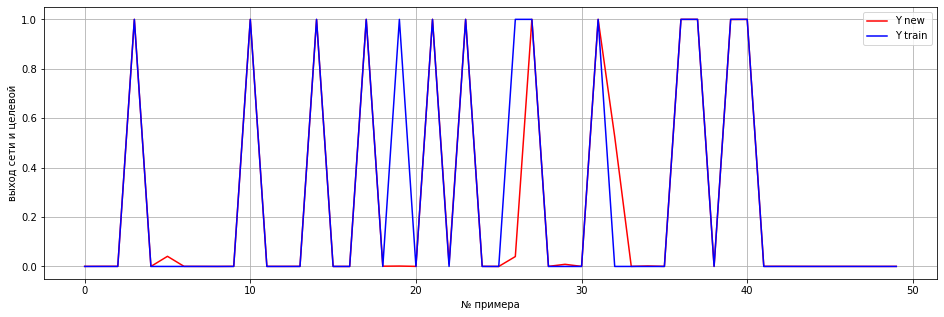

Доля правильных ответов на тесте 97.17%


In [8]:
# прямое распространение(feed forward)
layer0_t = X_test
layer1_t = expit(np.dot(layer0_t, w0))
layer2_t = expit(np.dot(layer1_t, w1))
layer3_t = expit(np.dot(layer2_t, w2))
layer4_t = expit(np.dot(layer3_t, w3))

layer4_error_t = y_test - layer4_t
  
N = 50
plt.figure(figsize = (16,5))
plt.plot(layer4_t[:N,1], 'r',label = 'Y new')
plt.plot(y_test[:N,1],'b', label = 'Y train')
plt.xlabel('№ примера')
plt.ylabel('выход сети и целевой')
plt.grid()
plt.legend( )
plt.show() # расскоментируйте, чтобы посмотреть

# метрика модели
error_t = np.mean(np.abs(layer4_error_t))
accuracy_t = (1 - error_t) * 100
print("Доля правильных ответов на тесте " + str(round(accuracy_t,2)) + "%")

Делал на скорую руку, поэтому без гридсерча.
Прирост качества(доля правильных ответов) нейронной сети обеспечивается за счет увеличения количества эпох обучения, скорости обучения, также прирост обеспечивается за счет увеличения числа нейронов скрытого слоя, количества слоёв и за счет более точного подбора синаптических весов(начальных весов). Небольшое(например 1) количество нейронов, высокая скорость обучения(шаг), малое(не обеспечивающее сходимость) количество эпох обучения - ухудшают результат.